In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;  
}

<IPython.core.display.Javascript object>

In [2]:
import sys
sys.path.append('/Users/af/Work/code/mcmc/build')
#sys.path.append('/Users/af/Work/code/mcmc/debug')

import mcmc
#help(mcmc)
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
lh = mcmc.FourGaussians(6)
s  = mcmc.State()

s.add(lh)

t  = mcmc.TempTarget(10)
t.set_posterior(s)

c  = mcmc.Chain(t, 0)





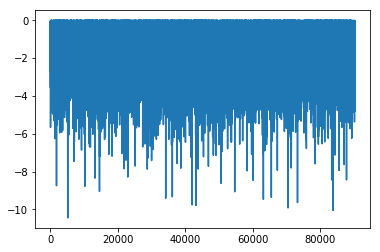

In [4]:
c.writeSamplesToDisk = False
c.recordSamples = True

nChains = 1000
nSteps = 100
nThinning = 10
nBurnin = 0
nTrials = 100000


thin = 50
c.run(nTrials*thin, np.int(nTrials*thin*0.1), 10000, thin)
plt.plot(c.get_loglikes())
plt.show()


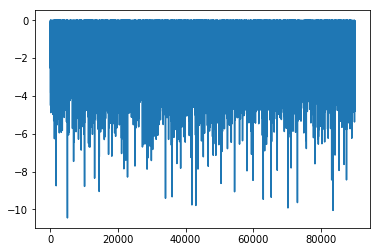

In [5]:
c.writeSamplesToDisk = False
c.recordSamples = True
c.reevaluate(s, 100)
plt.plot(c.get_loglikes())
plt.show()

In [6]:
sa = c.get_samples("pos");
x = sa[:,0];
y = sa[:,1];

print(x)
print(y)

[ 1.15327457  0.02166624  0.87276331 ...  0.95165678  0.46685264
 -0.46969749]
[ 1.12419403 -1.11670214 -1.68589175 ... -0.96870035 -1.50531723
 -0.83446939]


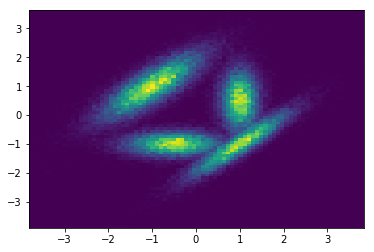

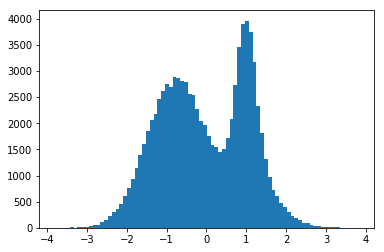

In [7]:
plt.hist2d(x,y, 80);
plt.show()
plt.hist(x, 80)
plt.show()

In [8]:
t2  = mcmc.TempTarget(1.0)
t2.set_posterior(s)


cm = mcmc.ChainManager(t2, nTrials, nChains)

cm.run_chains(nSteps, nThinning, 1)


In [9]:
cm.reevaluate_all(s, nBurnin, True, True)

print(cm.get_chain(0))
samples = cm.get_chain(0).get_samples("pos")

print(samples)

for i in np.arange(1, nChains):
    samples = np.vstack((samples, cm.get_chain(i).get_samples("pos")))
    


[[ 1.18345017 -0.89526292]
 [ 1.01174433 -0.96461877]
 [ 1.01174433 -0.96461877]
 [ 0.71978206 -1.32943972]
 [ 0.71978206 -1.32943972]
 [ 0.71978206 -1.32943972]
 [ 1.10498745 -0.97622284]
 [ 0.96724791 -0.98771879]
 [ 0.97811014 -1.04118487]]


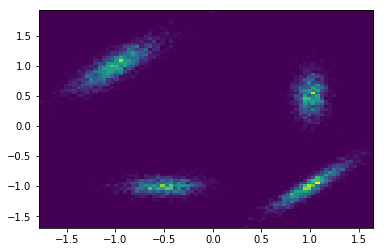

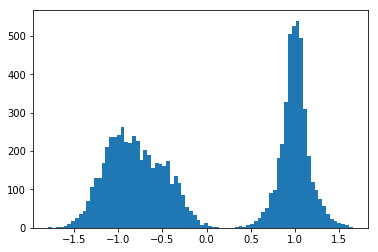

In [10]:
plt.hist2d(samples[:,0], samples[:,1], 80)
plt.show()
plt.hist(samples[:,0], 80)
plt.show()

In [11]:
t2  = mcmc.TempTarget(1.0)

# lh = mcmc.FourGaussians(6)
# s  = mcmc.State()

# s.add(lh)

t2.set_posterior(s)
cm = mcmc.ChainManager(c, t2, nChains)

cm.run_chains(nSteps, nThinning, 1/5.)









In [24]:
cm.reevaluate_all(s, 0, True, False)

samples = cm.get_chain(0).get_samples("pos")*cm.get_chain(0).weight

for i in np.arange(1, nChains):
    samples = np.vstack((samples, cm.get_chain(i).weight*cm.get_chain(i).get_samples("pos")))

weights = [] 
for i in np.arange(0, nChains):
    weights.append(cm.get_chain(i).weight)
weights = np.array(weights)
print(np.max(weights))
    

2.0


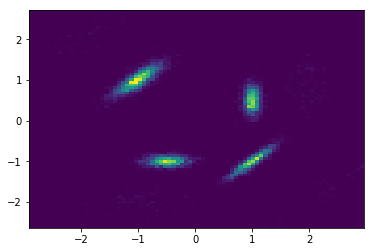

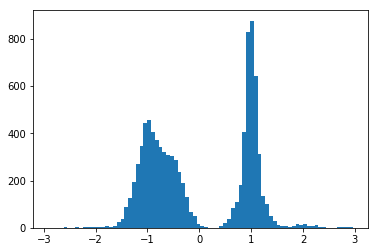

(array([976.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.]),
 array([0.        , 0.06931472, 0.13862944, 0.20794415, 0.27725887,
        0.34657359, 0.41588831, 0.48520303, 0.55451774, 0.62383246,
        0.69314718]),
 <a list of 10 Patch objects>)

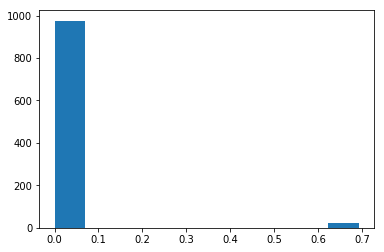

In [25]:
plt.hist2d(samples[:,0], samples[:,1], 80)
plt.show()
plt.hist(samples[:,0], 80)
plt.show()
plt.hist(np.log(weights))

In [38]:
testchain = cm.get_chain(1)






In [27]:
testchain.get_samples("pos")

array([[-0.96382604,  0.82781197],
       [-0.84602926,  0.95569337],
       [-1.00691356,  1.02746296],
       [-1.04585704,  0.93713309],
       [-1.05654283,  0.98500425],
       [-1.39792664,  0.72345455],
       [-1.05746627,  0.83052485],
       [-1.30872834,  0.76329066],
       [-1.20045319,  0.72785729],
       [-1.16853571,  0.91880339],
       [-0.78003518,  1.03898944],
       [-1.08135708,  1.11436202],
       [-0.82591564,  1.25765019],
       [-1.03065144,  1.11708763],
       [-1.08583369,  1.00306905],
       [-0.87529935,  0.99256693],
       [-0.99456564,  1.04102569],
       [-0.85041759,  1.27403887],
       [-0.96062506,  1.09816396],
       [-1.07965877,  0.93371033],
       [-0.84664274,  0.76226797],
       [-1.13611429,  0.88547444],
       [-0.65325905,  1.33592251],
       [-1.02300584,  1.0031626 ],
       [-0.9012358 ,  0.9873245 ],
       [-1.03757912,  0.8574489 ],
       [-1.15213606,  0.86093062],
       [-0.74950337,  1.1115138 ],
       [-0.60843277,